In [2]:
!pip install -U scikit-learn

---


### **Import Libraries**

In [3]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

### **Load Dataset as DataFrame**

In [4]:
fetal_health_df = pd.read_csv('fetal_health.csv')
fetal_health_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
# Dropping null values
fetal_health_df.dropna(inplace = True)
fetal_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

### **Select Input and Output Features**

In [6]:
output = fetal_health_df['fetal_health']
features = fetal_health_df.drop(columns=['fetal_health'])


### **Data Partitioning**

In [7]:
train_X, test_X, train_y, test_y = train_test_split(features, output, test_size = 0.2, random_state = 1)

- `test_size`: Amount of data to be used for testing.

- `random_state`: Sets a seed for random number generation, ensuring the split is reproducible (same train/test sets every time you run it)

## **Prediction Modeling using Different Models**

In [8]:
# Defining prediction model
clf = DecisionTreeClassifier(random_state = 0)
clf2 = RandomForestClassifier(random_state = 0)
clf3 = AdaBoostClassifier(random_state = 0)

# Fitting model on training data
clf.fit(train_X, train_y)
clf2.fit(train_X, train_y)
clf3.fit(train_X, train_y)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,0


### **Visualizing Trained Decision Tree Model**

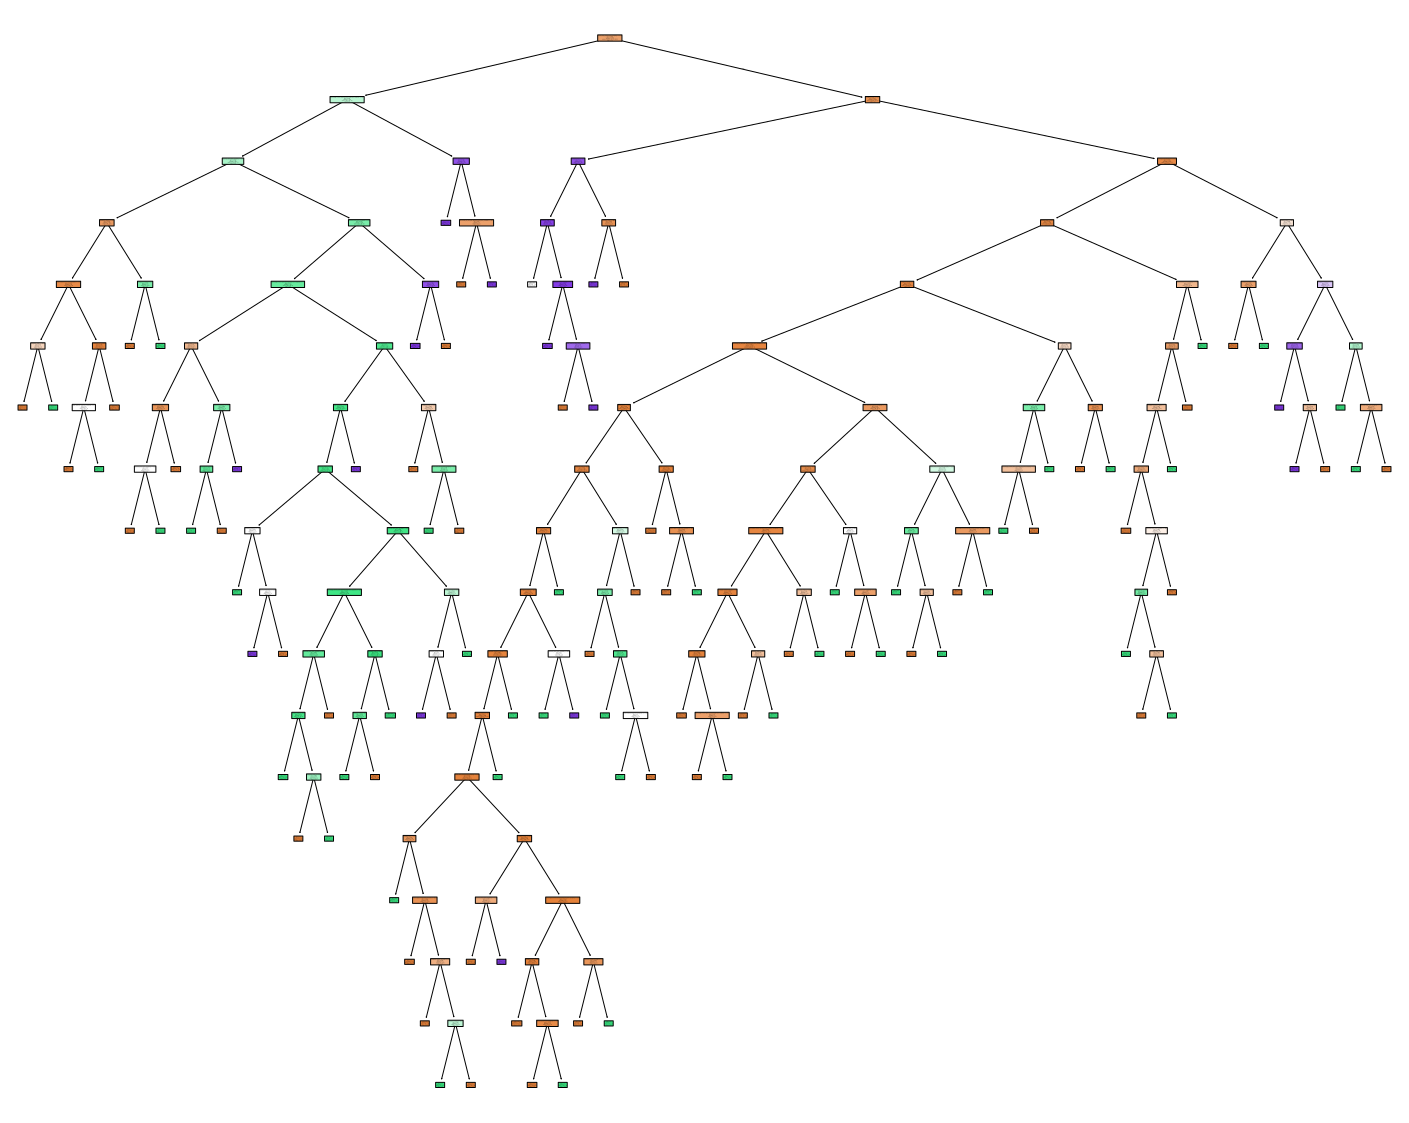

In [9]:
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = [str(cls) for cls in clf.classes_],
                   filled = True)

# Saving Decision Tree
fig.savefig("dt_visual.svg", bbox_inches = 'tight')

fig

### **Model Evaluation**

#### **Evaluation on Train Set**

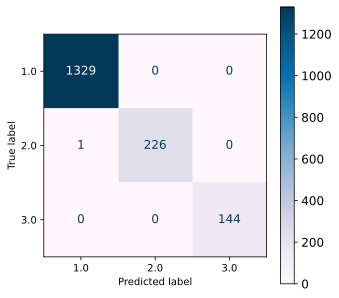

In [10]:
# Predictions on training set
fetal_pred_train = clf.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, fetal_pred_train, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

fig

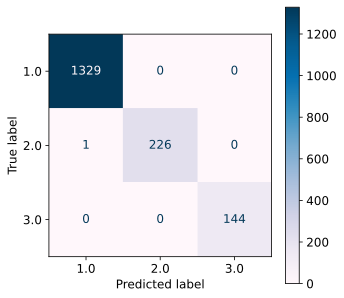

In [11]:
# Predictions on training set
fetal_pred_train2 = clf2.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, fetal_pred_train2, labels = clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf2.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

fig

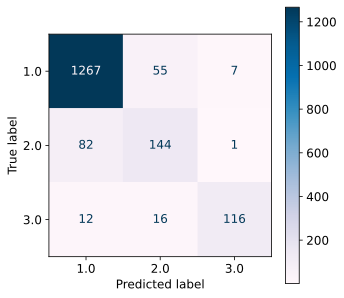

In [12]:
# Predictions on training set
fetal_pred_train3 = clf3.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, fetal_pred_train3, labels = clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf3.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

fig

#### **Evaluation on Test Set**

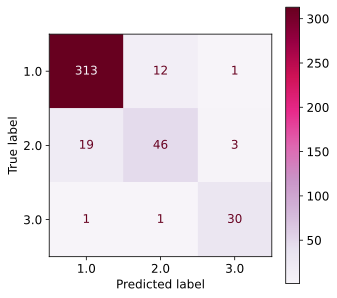

In [13]:
# Predictions on test set
fetal_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, fetal_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat_dt.svg", bbox_inches = 'tight');

fig

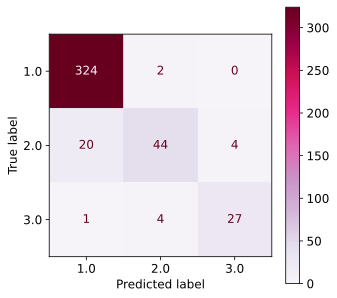

In [14]:
# Predictions on test set
fetal_pred2 = clf2.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, fetal_pred2, labels = clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf2.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat_rf.svg", bbox_inches = 'tight');

fig

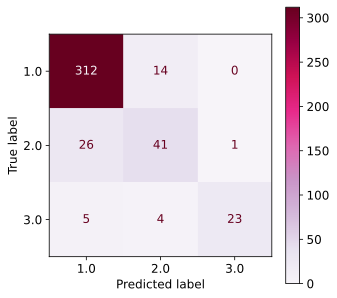

In [15]:
# Predictions on test set
fetal_pred3 = clf3.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, fetal_pred3, labels = clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf3.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat_ada.svg", bbox_inches = 'tight');

fig

**Choosing Colormaps in Matplotlib**: [**Check this link**](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

#### **Classification Report**

In [16]:
report = classification_report(test_y, fetal_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('class_report_dt.csv') 

report_df

,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.939940,0.779661,0.882353,0.913146,0.867318,0.910030
recall,0.960123,0.676471,0.937500,0.913146,0.858031,0.913146
f1-score,0.949924,0.724409,0.909091,0.913146,0.861141,0.910859
support,326.000000,68.000000,32.000000,0.913146,426.000000,426.000000


In [17]:
report2 = classification_report(test_y, fetal_pred2, output_dict = True)
report_df2 = pd.DataFrame(report2)
report_df2

# Save the report as a CSV File
report_df2.to_csv('class_report_rf.csv') 

report_df2

,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.939130,0.880000,0.870968,0.92723,0.896699,0.924572
recall,0.993865,0.647059,0.843750,0.92723,0.828225,0.927230
f1-score,0.965723,0.745763,0.857143,0.92723,0.856209,0.922456
support,326.000000,68.000000,32.000000,0.92723,426.000000,426.000000


In [18]:
report3 = classification_report(test_y, fetal_pred3, output_dict = True)
report_df3 = pd.DataFrame(report3)
report_df3

# Save the report as a CSV File
report_df3.to_csv('class_report_ada.csv') 

report_df3

,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.909621,0.694915,0.958333,0.882629,0.854290,0.879008
recall,0.957055,0.602941,0.718750,0.882629,0.759582,0.882629
f1-score,0.932735,0.645669,0.821429,0.882629,0.799944,0.878552
support,326.000000,68.000000,32.000000,0.882629,426.000000,426.000000


In [19]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_dt.svg");



In [20]:
# Storing importance values from the trained model
importance2 = clf2.feature_importances_

# Storing feature importance as a dataframe
feature_imp2 = pd.DataFrame(list(zip(train_X.columns, importance2)),
               columns = ['Feature', 'Importance'])

feature_imp2 = feature_imp2.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp2['Feature'], feature_imp2['Importance'], color = ['purple', 'pink'])
plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_rf.svg");



In [21]:
# Storing importance values from the trained model
importance3 = clf3.feature_importances_

# Storing feature importance as a dataframe
feature_imp3 = pd.DataFrame(list(zip(train_X.columns, importance3)),
               columns = ['Feature', 'Importance'])

feature_imp3 = feature_imp3.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp3['Feature'], feature_imp3['Importance'], color = ['purple', 'pink'])
plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_ada.svg");



In [22]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_fetal.pickle', 'wb') #wb = write in binary

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 

In [23]:
# Pickle file: saving the trained RF model
# Creating the file where we want to write the model
rf_pickle = open('random_forest_fetal.pickle', 'wb') #wb = write in binary

# Write RF model to the file
pickle.dump(clf2, rf_pickle)

# Close the file
rf_pickle.close()

In [24]:
# Pickle file: saving the trained AdaBoost model
# Creating the file where we want to write the model
ada_pickle = open('adaboost_fetal.pickle', 'wb') #wb = write in binary

# Write RF model to the file
pickle.dump(clf3, ada_pickle)

# Close the file
ada_pickle.close()

In [25]:
f1_macro_dt = report['macro avg']['f1-score']
f1_macro_rf = report2['macro avg']['f1-score']
f1_macro_ada = report3['macro avg']['f1-score']

In [26]:
f1_macros = np.array([f1_macro_dt, f1_macro_rf, f1_macro_ada], dtype=float)
norm_weights = f1_macros / f1_macros.sum()

print("Normalized weights:", norm_weights)
print("Sum of weights:", norm_weights.sum())

Normalized weights: [0.34208997 0.34013071 0.31777933]
Sum of weights: 1.0


In [27]:
clf4 = VotingClassifier(estimators=[('dt', clf), ('rf', clf2), ('ab', clf3)], voting='soft', weights = norm_weights)

In [28]:
clf4.fit(train_X, train_y)

,estimators,"[('dt', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,"array([0.3420..., 0.31777933])"
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


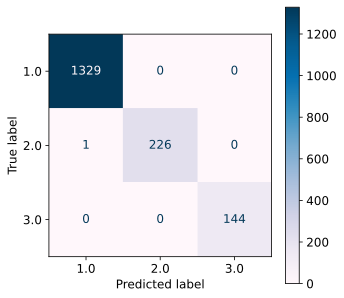

In [29]:
# Predictions on training set
fetal_pred_train4 = clf4.predict(train_X)

# Now generate confusion matrix
cm = confusion_matrix(train_y, fetal_pred_train4, labels = clf4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf4.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuBu', ax = ax);

fig

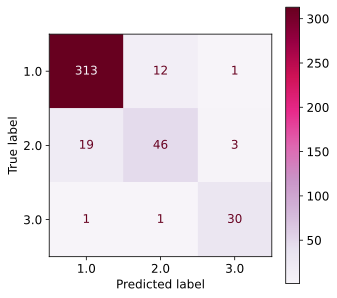

In [30]:
# Predictions on test set
fetal_pred4 = clf4.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, fetal_pred4, labels = clf4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf4.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)

# Save as SVG
plt.savefig("confusion_mat_sv.svg", bbox_inches = 'tight');

fig

In [31]:
report4 = classification_report(test_y, fetal_pred4, output_dict = True)
report_df4 = pd.DataFrame(report4)
report_df4

# Save the report as a CSV File
report_df4.to_csv('class_report_sv.csv') 

report_df4

,1.0,2.0,3.0,accuracy,macro avg,weighted avg
precision,0.939940,0.779661,0.882353,0.913146,0.867318,0.910030
recall,0.960123,0.676471,0.937500,0.913146,0.858031,0.913146
f1-score,0.949924,0.724409,0.909091,0.913146,0.861141,0.910859
support,326.000000,68.000000,32.000000,0.913146,426.000000,426.000000


In [32]:
importance4 = (
    norm_weights[0] * clf.feature_importances_ +
    norm_weights[1] * clf2.feature_importances_ +
    norm_weights[2] * clf3.feature_importances_
)

feature_imp4 = pd.DataFrame(list(zip(train_X.columns, importance4)),
               columns = ['Feature', 'Importance']).sort_values('Importance', ascending=False).reset_index(drop=True)
# Bar plot
plt.figure(figsize = (10, 5))
plt.barh(feature_imp4['Feature'], feature_imp4['Importance'], color = ['purple', 'pink'])
plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("feature_imp_sv.svg");



In [33]:
# Pickle file: saving the trained Soft Voting model
# Creating the file where we want to write the model
sv_pickle = open('soft_voting_fetal.pickle', 'wb') #wb = write in binary

# Write RF model to the file
pickle.dump(clf4, sv_pickle)

# Close the file
sv_pickle.close()